In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def visualize_electricity_consumption(file_path, predicted_value=None, consumption_column='Historical Demand (MW)', save_path=None):
    """
    Visualize electricity consumption data from a CSV file.

    Parameters:
    - file_path: Path to the CSV file
    - predicted_value: Optional predicted consumption value
    - consumption_column: Name of the column with consumption data
    - save_path: Optional path to save the graph
    """
    # Read the CSV file
    df = pd.read_csv(file_path)

    # If no predicted value is provided, use the mean or median
    if predicted_value is None:
        predicted_value = df[consumption_column].median()

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Pie Chart: Distribution relative to predicted consumption
    below_pred = sum(df[consumption_column] < predicted_value)
    above_pred = sum(df[consumption_column] >= predicted_value)

    pie_labels = ['Below Predicted', 'Above Predicted']
    pie_sizes = [below_pred, above_pred]
    pie_colors = ['lightcoral', 'lightskyblue']

    ax1.pie(pie_sizes, labels=pie_labels, colors=pie_colors, autopct='%1.1f%%',
            startangle=90, wedgeprops={'edgecolor': 'white'})
    ax1.set_title('Distribution of Electricity Consumption')

    # Bar Graph: Consumption Distribution
    # Create bins for consumption
    bins = np.linspace(df[consumption_column].min(), df[consumption_column].max(), 10)

    # Compute histogram
    hist, bin_edges = np.histogram(df[consumption_column], bins=bins)

    # Highlight bars around predicted value
    bar_colors = ['red' if abs(bin_center - predicted_value) < 1
                  else 'blue' for bin_center in (bin_edges[:-1] + bin_edges[1:]) / 2]

    ax2.bar(bin_edges[:-1], hist, width=np.diff(bin_edges),
            align='edge', color=bar_colors, alpha=0.7, edgecolor='black')
    ax2.axvline(x=predicted_value, color='red', linestyle='--',
                label=f'Predicted Consumption: {predicted_value:.2f}')
    ax2.set_title('Electricity Consumption Distribution')
    ax2.set_xlabel('Consumption')
    ax2.set_ylabel('Frequency')
    ax2.legend()

    plt.tight_layout()

    # Save the graph if a save path is provided
    if save_path:
        plt.savefig(save_path)
        print(f"Graph saved to {save_path}")
    
    plt.show()

    # Print some additional insights
    print(f"Total Records: {len(df)}")
    print(f"Minimum Consumption: {df[consumption_column].min():.2f}")
    print(f"Maximum Consumption: {df[consumption_column].max():.2f}")
    print(f"Average Consumption: {df[consumption_column].mean():.2f}")
    print(f"Median Consumption: {df[consumption_column].median():.2f}")
    print(f"Predicted/Median Consumption: {predicted_value:.2f}")

# Example usage
# Replace 'Dataset.csv' with your actual file path
# visualize_electricity_consumption('Dataset.csv', predicted_value=1000, save_path='electricity_consumption_graph.png')


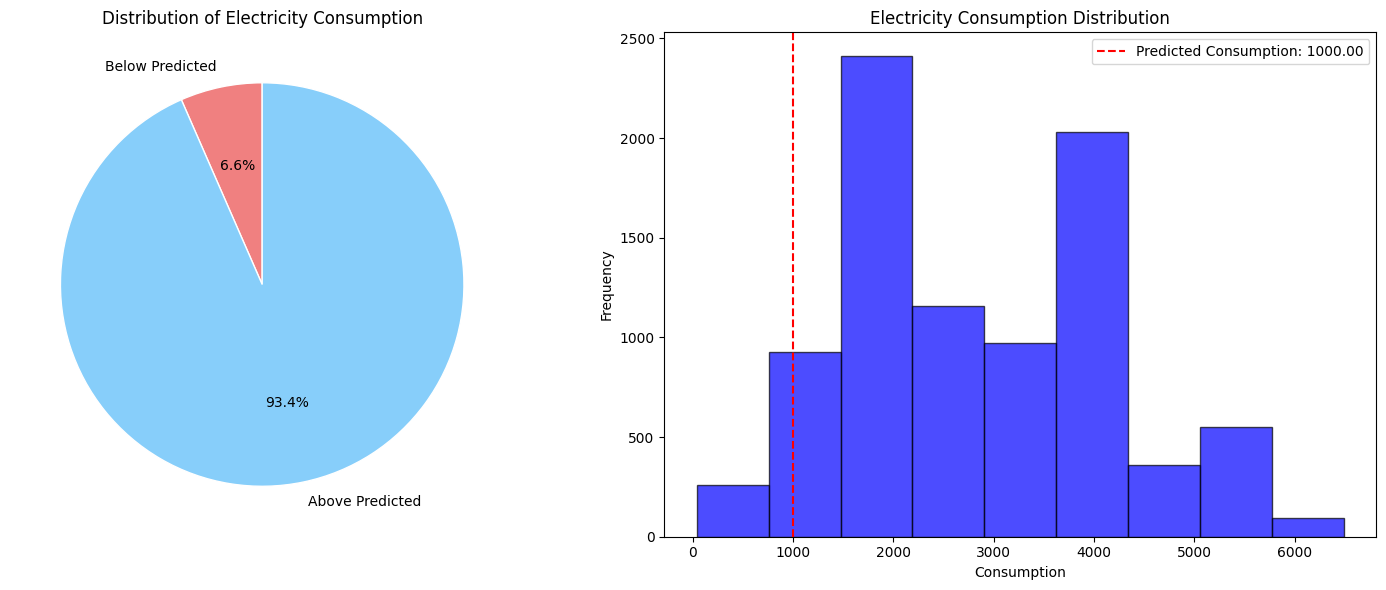

Total Records: 8761
Minimum Consumption: 41.00
Maximum Consumption: 6489.00
Average Consumption: 2860.64
Median Consumption: 2478.00
Predicted/Median Consumption: 1000.00


In [28]:
visualize_electricity_consumption('Dataset.csv', predicted_value=1000, save_path='electricity_consumption_graph.png')
